# Cuda out of memory error

If you get Cuda out of memory error, you need to reduce the batch sizes in the downloaded YAML file. (The yaml file will only get downloaded when it is not found in the file system, so you can safely edit and save the file and not have to worry about restarting the notebook later.)

## Ref. Speaker_Diarization_Inference.ipynb

I believe MSDD failed with CUDA out of memory error, and when restarting the process, TitaNet tried to recalculate the embeddings which is just pointless.
See the omegaconf .yaml file for exact model pipeline configuration.

In [6]:
import os
import wget
from omegaconf import OmegaConf

data_dir = "/home/kozi/Documents/_onlab_git/ami/"

#MODEL_CONFIG = os.path.join(data_dir,'diar_infer_telephonic.yaml')
MODEL_CONFIG = os.path.join(data_dir, 'diar_infer_meeting.yaml')
if not os.path.exists(MODEL_CONFIG):
    #config_url = "https://raw.githubusercontent.com/NVIDIA/NeMo/main/examples/speaker_tasks/diarization/conf/inference/diar_infer_telephonic.yaml"
    config_url = "https://github.com/NVIDIA/NeMo/blob/main/examples/speaker_tasks/diarization/conf/inference/diar_infer_meeting.yaml"
    #MODEL_CONFIG = wget.download(config_url, data_dir) # do this manually or change the URL to raw.githubusercontent.com

config = OmegaConf.load(MODEL_CONFIG)
print(OmegaConf.to_yaml(config))

name: ClusterDiarizer
num_workers: 1
sample_rate: 16000
batch_size: 1
device: null
verbose: true
diarizer:
  manifest_filepath: ???
  out_dir: ???
  oracle_vad: false
  collar: 0.25
  ignore_overlap: true
  vad:
    model_path: vad_multilingual_marblenet
    external_vad_manifest: null
    parameters:
      window_length_in_sec: 0.63
      shift_length_in_sec: 0.01
      smoothing: false
      overlap: 0.5
      onset: 0.9
      offset: 0.5
      pad_onset: 0
      pad_offset: 0
      min_duration_on: 0
      min_duration_off: 0.6
      filter_speech_first: true
  speaker_embeddings:
    model_path: titanet_large
    parameters:
      window_length_in_sec:
      - 3.0
      - 2.5
      - 2.0
      - 1.5
      - 1.0
      - 0.5
      shift_length_in_sec:
      - 1.5
      - 1.25
      - 1.0
      - 0.75
      - 0.5
      - 0.25
      multiscale_weights:
      - 1
      - 1
      - 1
      - 1
      - 1
      - 1
      save_embeddings: true
  clustering:
    parameters:
      oracle_num_

In [1]:
# this block of code is only here to test https://github.com/NVIDIA/NeMo/blob/main/examples/speaker_tasks/diarization/clustering_diarizer/offline_diar_with_asr_infer.py
!python3 /home/kozi/Documents/NeMo/examples/speaker_tasks/diarization/clustering_diarizer/offline_diar_with_asr_infer.py \
    diarizer.manifest_filepath="/home/kozi/Documents/_onlab_git/ami/AMItest_input_manifest.Array1-01.json" \
    diarizer.out_dir="/home/kozi/Documents/_onlab_git/ami/tmp2" \
    diarizer.speaker_embeddings.model_path="titanet_small" \
    diarizer.asr.model_path="stt_en_quartznet15x5" \
    diarizer.asr.parameters.asr_based_vad=True \
    diarizer.speaker_embeddings.parameters.save_embeddings=True

# try
#stt_en_quartznet15x5
#stt_en_citrinet*
#stt_en_conformer_ctc*

[NeMo W 2024-05-18 17:35:59 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    
[NeMo I 2024-05-18 17:35:59 offline_diar_with_asr_infer:49] Hydra config: name: ClusterDiarizer
    num_workers: 1
    sample_rate: 16000
    batch_size: 64
    device: null
    verbose: true
    diarizer:
      manifest_filepath: /home/kozi/Documents/_onlab_git/ami/AMItest_input_manifest.Array1-01.json
      out_dir: /home/kozi/Documents/_onlab_git/ami/tmp2
      oracle_vad: false
      collar: 0.25
      ignore_overlap: true
      vad:
        model_path: vad_multilingual_marblenet
        external_vad_manifest: null
        parameters:
          window_length_in_sec: 0.63
          shift_length_in_sec: 0.01
          smoo

In [40]:
# this block of code is to calculate RTTM scores NeMo style

!python /home/kozi/Documents/NeMo/scripts/speaker_tasks/eval_diar_with_asr.py \
 --hyp_rttm_list="/home/kozi/Documents/_onlab_git/ami/tmp/pred_rttms/hyp_rttm_list.list" \
 --ref_rttm_list="/home/kozi/Documents/_onlab_git/ami/tmp/pred_rttms/ref_rttm_list.list" \
 --root_path="/home/kozi/Documents/_onlab_git/ami/nemo_diar_score_output/"
# the output directory stores a .csv file that contains the mapping of the reference RTTM file speaker IDs to the hypothesis ones


[NeMo W 2024-05-18 16:54:02 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
      warnings.warn(
    
[NeMo I 2024-05-18 16:54:03 der:176] Cumulative Results for collar 0.0 sec and ignore_overlap False: 
     FA: 0.0000	 MISS 0.2511	                 Diarization ER: 0.2988	, Confusion ER:0.0477
[NeMo I 2024-05-18 16:54:04 der:176] Cumulative Results for collar 0.25 sec and ignore_overlap False: 
     FA: 0.0000	 MISS 0.1944	                 Diarization ER: 0.2279	, Confusion ER:0.0335
[NeMo I 2024-05-18 16:54:04 der:176] Cumulative Results for collar 0.25 sec and ignore_overlap True: 
     FA: 0.0000	 MISS 0.0000	                 Diarization ER: 0.0398	, Confusion ER:0.0398
[NeMo I 2024-05-18 16:54:05 diarization_utils:1259] 
    DER                : 0.0398                      
    FA                 : 0.0000                      
    MI

In [41]:
!python /home/kozi/Documents/NeMo/scripts/speaker_tasks/eval_diar_with_asr.py \
 --hyp_rttm_list="/home/kozi/Documents/_onlab_git/ami/tmp/pred_rttms/hyp2.list" \
 --ref_rttm_list="/home/kozi/Documents/_onlab_git/ami/tmp/pred_rttms/ref2.list" \
 --root_path="/home/kozi/Documents/_onlab_git/ami/nemo_diar_score_output/"

[NeMo W 2024-05-18 16:54:30 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/pyannote/metrics/utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
      warnings.warn(
    
[NeMo I 2024-05-18 16:54:30 der:176] Cumulative Results for collar 0.0 sec and ignore_overlap False: 
     FA: 0.0000	 MISS 0.2401	                 Diarization ER: 0.2779	, Confusion ER:0.0378
[NeMo I 2024-05-18 16:54:31 der:176] Cumulative Results for collar 0.25 sec and ignore_overlap False: 
     FA: 0.0000	 MISS 0.1971	                 Diarization ER: 0.2226	, Confusion ER:0.0255
[NeMo I 2024-05-18 16:54:31 der:176] Cumulative Results for collar 0.25 sec and ignore_overlap True: 
     FA: 0.0000	 MISS 0.0000	                 Diarization ER: 0.0283	, Confusion ER:0.0283
[NeMo I 2024-05-18 16:54:31 diarization_utils:1259] 
    DER                : 0.0283                      
    FA                 : 0.0000                      
    MI

In [7]:
# ref. https://docs.nvidia.com/nemo-framework/user-guide/latest/nemotoolkit/asr/speaker_diarization/datasets.html#ami-meeting-corpus
# see <NeMo_git_root>/examples/speaker_tasks/diarization/conf/inference/diar_infer_meeting.yaml

#python3 /home/kozi/Documents/NeMo/scripts/dataset_processing/speaker_tasks/get_ami_data.py --test_manifest_filepath /home/kozi/Documents/_onlab_git/ami/AMItest_input_manifest.json

# <NeMo_git_root>/examples/speaker_tasks/diarization/conf/inference/diar_infer_meeting.yaml

config.diarizer.manifest_filepath="/home/kozi/Documents/_onlab_git/ami/AMItest_input_manifest.Array1-01.json"
config.diarizer.oracle_num_speakers=None # Performing unknown number of speaker case
#config.diarizer.clustering.parameters.oracle_num_speakers = False
config.diarizer.oracle_vad=True # Use oracle VAD extracted from RTTM files.
config.diarizer.collar=0.25
config.diarizer.ignore_overlap=True
#config.diarizer.speaker_embeddings.model_path="titanet_large"

config.diarizer.out_dir = "/home/kozi/Documents/_onlab_git/ami/tmp/" # Directory to store intermediate files and prediction outputs
pretrained_speaker_model = 'titanet_large'
config.diarizer.speaker_embeddings.batch_size = 1
#config.diarizer.speaker_embeddings.parameters.window_length_in_sec = [1.5,1.25,1.0,0.75,0.5] 
#config.diarizer.speaker_embeddings.parameters.shift_length_in_sec = [0.75,0.625,0.5,0.375,0.1] 
#config.diarizer.speaker_embeddings.parameters.multiscale_weights= [1,1,1,1,1] 

In [ ]:
# try to only use the cell before this...
# okay this cell is not necessary, do not run it.
data_dir = "/home/kozi/Documents/_onlab_git/ami/"

from omegaconf import OmegaConf

MODEL_CONFIG = os.path.join(data_dir,'diar_infer_telephonic.yaml')
if not os.path.exists(MODEL_CONFIG):
    config_url = "https://raw.githubusercontent.com/NVIDIA/NeMo/main/examples/speaker_tasks/diarization/conf/inference/diar_infer_telephonic.yaml"
    MODEL_CONFIG = wget.download(config_url,data_dir)

config = OmegaConf.load(MODEL_CONFIG)
print(OmegaConf.to_yaml(config))

config.diarizer.manifest_filepath="/home/kozi/Documents/ami_by_nemo/AMItest_input_manifest.Array1-01.json"
config.diarizer.out_dir = "/home/kozi/Documents/ami_by_nemo/tmp" # Directory to store intermediate files and prediction outputs
#pretrained_speaker_model = 'titanet_large'
config.diarizer.speaker_embeddings.model_path = pretrained_speaker_model
config.diarizer.speaker_embeddings.parameters.window_length_in_sec = [1.5,1.25,1.0,0.75,0.5] 
config.diarizer.speaker_embeddings.parameters.shift_length_in_sec = [0.75,0.625,0.5,0.375,0.1] 
config.diarizer.speaker_embeddings.parameters.multiscale_weights= [1,1,1,1,1] 
config.diarizer.oracle_vad = True # ----> ORACLE VAD 
config.diarizer.clustering.parameters.oracle_num_speakers = False

In [4]:
from nemo.collections.asr.models import ClusteringDiarizer

oracle_vad_clusdiar_model = ClusteringDiarizer(cfg=config)

oracle_vad_clusdiar_model.diarize()

[NeMo I 2024-05-16 23:36:22 clustering_diarizer:157] Loading pretrained titanet_large model from NGC
[NeMo I 2024-05-16 23:36:22 cloud:58] Found existing object /home/kozi/.cache/torch/NeMo/NeMo_1.21.0rc0/titanet-l/11ba0924fdf87c049e339adbf6899d48/titanet-l.nemo.


[NeMo I 2024-05-16 23:36:22 cloud:64] Re-using file from: /home/kozi/.cache/torch/NeMo/NeMo_1.21.0rc0/titanet-l/11ba0924fdf87c049e339adbf6899d48/titanet-l.nemo
[NeMo I 2024-05-16 23:36:22 common:913] Instantiating model from pre-trained checkpoint


[NeMo W 2024-05-16 23:36:23 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /manifests/combined_fisher_swbd_voxceleb12_librispeech/train.json
    sample_rate: 16000
    labels: null
    batch_size: 64
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    augmentor:
      noise:
        manifest_path: /manifests/noise/rir_noise_manifest.json
        prob: 0.5
        min_snr_db: 0
        max_snr_db: 15
      speed:
        prob: 0.5
        sr: 16000
        resample_type: kaiser_fast
        min_speed_rate: 0.95
        max_speed_rate: 1.05
    num_workers: 15
    pin_memory: true
    
[NeMo W 2024-05-16 23:36:23 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method 

[NeMo I 2024-05-16 23:36:23 features:289] PADDING: 16
[NeMo I 2024-05-16 23:36:23 audio_preprocessing:517] Numba CUDA SpecAugment kernel is being used
[NeMo I 2024-05-16 23:36:23 save_restore_connector:249] Model EncDecSpeakerLabelModel was successfully restored from /home/kozi/.cache/torch/NeMo/NeMo_1.21.0rc0/titanet-l/11ba0924fdf87c049e339adbf6899d48/titanet-l.nemo.


[NeMo W 2024-05-16 23:36:23 clustering_diarizer:411] Deleting previous clustering diarizer outputs.


[NeMo I 2024-05-16 23:36:23 speaker_utils:93] Number of files to diarize: 16
[NeMo I 2024-05-16 23:36:24 clustering_diarizer:287] Subsegmentation for embedding extraction: scale0, /home/kozi/Documents/_onlab_git/ami/tmp/speaker_outputs/subsegments_scale0.json
[NeMo I 2024-05-16 23:36:24 clustering_diarizer:343] Extracting embeddings for Diarization
[NeMo I 2024-05-16 23:36:24 collections:445] Filtered duration for loading collection is  0.00 hours.
[NeMo I 2024-05-16 23:36:24 collections:446] Dataset loaded with 17039 items, total duration of  13.11 hours.
[NeMo I 2024-05-16 23:36:24 collections:448] # 17039 files loaded accounting to # 1 labels


[1/6] extract embeddings:   5%|▍         | 818/17039 [00:24<08:08, 33.19it/s]


KeyboardInterrupt: 

In [ ]:
#!cat {output_dir}/pred_rttms/an4_diarize_test.rttm
!cat /home/kozi/Documents/_onlab_git/ami/tmp/pred_rttms/EN2002a.Array1-01.rttm

Clustering Diarizer Result (RTTM format)


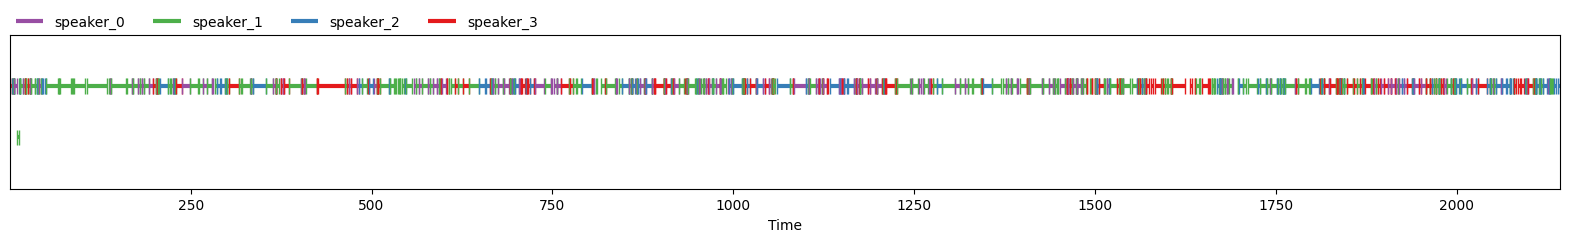

In [14]:
# run the very long cell at the end of the notebook before running this cell

print("Clustering Diarizer Result (RTTM format)")
pred_labels_neural = rttm_to_labels("/home/kozi/Documents/_onlab_git/ami/tmp/pred_rttms/EN2002a.Array1-01.rttm")
hypothesis_neural = labels_to_pyannote_object(pred_labels_neural)
hypothesis_neural

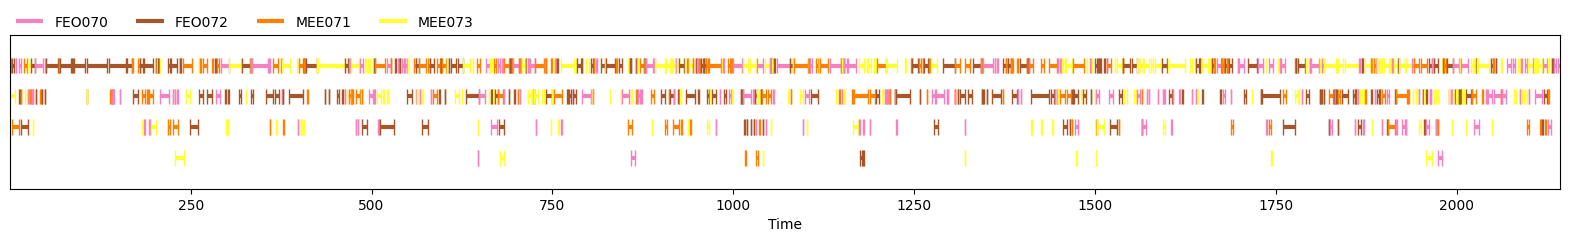

In [16]:
truth = "/home/kozi/Documents/_onlab_git/ami/ami_dataset/test/rttm/EN2002a.rttm"
truth_labels = rttm_to_labels(truth)
truth_graph = labels_to_pyannote_object(truth_labels)
truth_graph

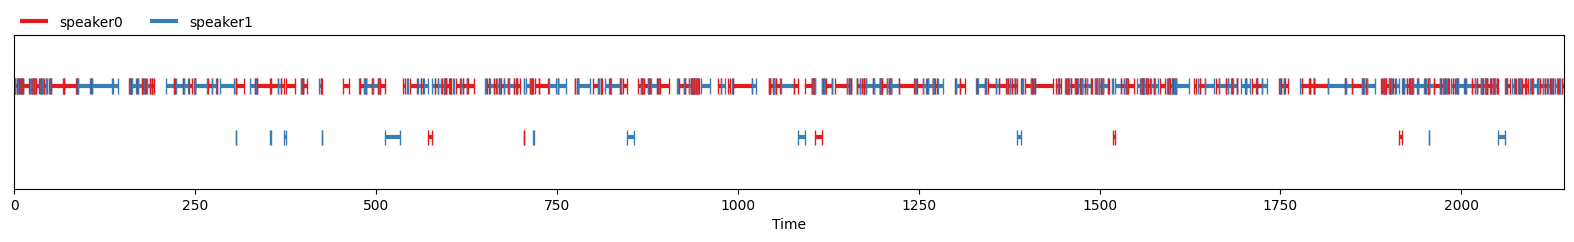

In [8]:
truth = '/home/kozi/Documents/_onlab_git/ami/tinydiarize_output.rttm'
truth_labels = rttm_to_labels(truth)
truth_graph = labels_to_pyannote_object(truth_labels)
truth_graph

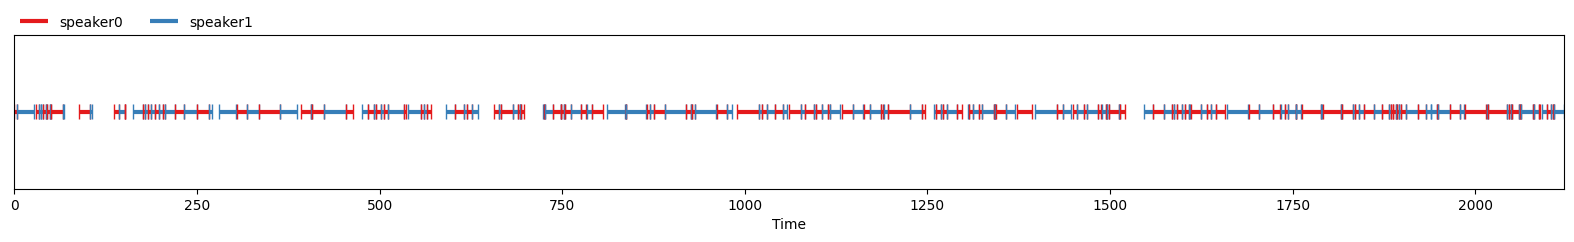

In [3]:
truth = "/home/kozi/Documents/_onlab_git/ami/whisper_cpp_tdrz_rttm.rttm"
truth_labels = rttm_to_labels(truth)
truth_graph = labels_to_pyannote_object(truth_labels)
truth_graph

In [34]:
!python3 /home/kozi/Documents/_onlab_git/dscore/score.py -s "/home/kozi/Documents/_onlab_git/ami/tmp/pred_rttms/EN2002a.rttm" "/home/kozi/Documents/_onlab_git/ami/tmp/pred_rttms/EN2002b.rttm" -r "/home/kozi/Documents/_onlab_git/ami/ami_dataset/test/rttm/EN2002a.rttm" "/home/kozi/Documents/_onlab_git/ami/ami_dataset/test/rttm/EN2002b.rttm"
# -s: system outputs [predicted rttm]; -r: reference [ground-truth rttm]
# two errors: in metrics.py np.int is deprecated, the builtin int should be used
#    global_der = file_to_der_base.get('ALL', 0.0) # a safe getter should be used to get 'ALL'


Loading speaker turns from reference RTTMs...
Loading speaker turns from system RTTMs...
Trimming reference speaker turns to UEM scoring regions...
Trimming system speaker turns to UEM scoring regions...
Checking for overlapping reference speaker turns...
Checking for overlapping system speaker turns...
Scoring...
File               DER    JER    B3-Precision    B3-Recall    B3-F1    GKT(ref, sys)    GKT(sys, ref)    H(ref|sys)    H(sys|ref)    MI    NMI
---------------  -----  -----  --------------  -----------  -------  ---------------  ---------------  ------------  ------------  ----  -----
EN2002a          29.88  34.69            0.54         0.79     0.64             0.72             0.47          1.64          0.57  1.62   0.60
EN2002b          27.79  33.57            0.60         0.83     0.69             0.78             0.52          1.42          0.46  1.71   0.66
*** OVERALL ***  28.97  34.13            0.56         0.81     0.66             0.78             0.53          1

In [33]:
!python3 /home/kozi/Documents/_onlab_git/dscore/score.py --collar 0.100 --ignore_overlaps -s "/home/kozi/Documents/_onlab_git/ami/tmp/pred_rttms/EN2002a.rttm" "/home/kozi/Documents/_onlab_git/ami/tmp/pred_rttms/EN2002b.rttm" -r "/home/kozi/Documents/_onlab_git/ami/ami_dataset/test/rttm/EN2002a.rttm" "/home/kozi/Documents/_onlab_git/ami/ami_dataset/test/rttm/EN2002b.rttm"
# -s: system outputs [predicted rttm]; -r: reference [ground-truth rttm]
# two errors: in metrics.py np.int is deprecated, the builtin int should be used
#    global_der = file_to_der_base.get('ALL', 0.0) # a safe getter should be used to get 'ALL'


Loading speaker turns from reference RTTMs...
Loading speaker turns from system RTTMs...
Trimming reference speaker turns to UEM scoring regions...
Trimming system speaker turns to UEM scoring regions...
Checking for overlapping reference speaker turns...
Checking for overlapping system speaker turns...
Scoring...
File               DER    JER    B3-Precision    B3-Recall    B3-F1    GKT(ref, sys)    GKT(sys, ref)    H(ref|sys)    H(sys|ref)    MI    NMI
---------------  -----  -----  --------------  -----------  -------  ---------------  ---------------  ------------  ------------  ----  -----
EN2002a           5.43  34.69            0.54         0.79     0.64             0.72             0.47          1.64          0.57  1.62   0.60
EN2002b           3.97  33.57            0.60         0.83     0.69             0.78             0.52          1.42          0.46  1.71   0.66
*** OVERALL ***   4.78  34.13            0.56         0.81     0.66             0.78             0.53          1

In [26]:
!python3 /home/kozi/Documents/_onlab_git/dscore/score.py -u "/home/kozi/Documents/_onlab_git/ami/ami_dataset/test/uem/EN2002a.uem" -s "/home/kozi/Documents/_onlab_git/ami/tmp/pred_rttms/EN2002a.rttm" -r "/home/kozi/Documents/_onlab_git/ami/ami_dataset/test/rttm/EN2002a.rttm"
# UEM [unpartitioned evaluation map] files do not change the scoring



Loading speaker turns from reference RTTMs...
Loading speaker turns from system RTTMs...
Loading universal evaluation map...
Trimming reference speaker turns to UEM scoring regions...
Trimming system speaker turns to UEM scoring regions...
Checking for overlapping reference speaker turns...
Checking for overlapping system speaker turns...
Scoring...
File               DER    JER    B3-Precision    B3-Recall    B3-F1    GKT(ref, sys)    GKT(sys, ref)    H(ref|sys)    H(sys|ref)    MI    NMI
---------------  -----  -----  --------------  -----------  -------  ---------------  ---------------  ------------  ------------  ----  -----
EN2002a          29.88  34.69            0.54         0.79     0.64             0.72             0.47          1.64          0.57  1.62   0.61
*** OVERALL ***  29.88  34.69            0.54         0.79     0.64             0.72             0.47          1.64          0.57  1.62   0.61


In [1]:
# run this cell to import all functions from speaker_utils.py

# Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import gc
import json
import math
import os
import shutil
from copy import deepcopy
from typing import Dict, List, Tuple, Union

import numpy as np
import omegaconf
import soundfile as sf
import torch
from pyannote.core import Annotation, Segment
from tqdm import tqdm

#from nemo.collections.asr.data.audio_to_label import repeat_signal
#from nemo.collections.asr.parts.utils.longform_clustering import LongFormSpeakerClustering
#from nemo.collections.asr.parts.utils.offline_clustering import SpeakerClustering, get_argmin_mat, split_input_data
#from nemo.utils import logging

"""
This file contains all the utility functions required for speaker embeddings part in diarization scripts
"""


def get_uniqname_from_filepath(filepath):
    """
    Return base name from provided filepath
    """
    if type(filepath) is str:
        uniq_id = os.path.splitext(os.path.basename(filepath))[0]
        return uniq_id
    else:
        raise TypeError("input must be filepath string")


def get_uniq_id_from_manifest_line(line: str) -> str:
    """
    Retrieve `uniq_id` from the `audio_filepath` in a manifest line.
    """
    dic = json.loads(line.strip())
    uniq_id = get_uniqname_from_filepath(dic['audio_filepath'])
    return uniq_id


def get_uniq_id_with_dur(meta, decimals=3):
    """
    Return basename with offset and end time labels
    """
    # bare_uniq_id = get_uniqname_from_filepath(meta['audio_filepath'])
    bare_uniq_id = get_uniqname_from_filepath(meta['rttm_filepath'])
    if meta['offset'] is None and meta['duration'] is None:
        return bare_uniq_id
    if meta['offset']:
        offset = str(int(round(meta['offset'], decimals) * pow(10, decimals)))
    else:
        offset = 0
    if meta['duration']:
        endtime = str(int(round(meta['offset'] + meta['duration'], decimals) * pow(10, decimals)))
    else:
        endtime = 'NULL'
    uniq_id = f"{bare_uniq_id}_{offset}_{endtime}"
    return uniq_id


def audio_rttm_map(manifest, attach_dur=False):
    """
    This function creates AUDIO_RTTM_MAP which is used by all diarization components to extract embeddings,
    cluster and unify time stamps
    Args: manifest file that contains keys audio_filepath, rttm_filepath if exists, text, num_speakers if known and uem_filepath if exists

    returns:
    AUDIO_RTTM_MAP (dict) : A dictionary with keys of uniq id, which is being used to map audio files and corresponding rttm files
    """

    AUDIO_RTTM_MAP = {}
    with open(manifest, 'r') as inp_file:
        lines = inp_file.readlines()
        logging.info("Number of files to diarize: {}".format(len(lines)))
        for line in lines:
            line = line.strip()
            dic = json.loads(line)

            meta = {
                'audio_filepath': dic['audio_filepath'],
                'rttm_filepath': dic.get('rttm_filepath', None),
                'offset': dic.get('offset', None),
                'duration': dic.get('duration', None),
                'text': dic.get('text', None),
                'num_speakers': dic.get('num_speakers', None),
                'uem_filepath': dic.get('uem_filepath', None),
                'ctm_filepath': dic.get('ctm_filepath', None),
            }
            if attach_dur:
                uniqname = get_uniq_id_with_dur(meta)
            else:
                uniqname = get_uniqname_from_filepath(filepath=meta['audio_filepath'])

            if uniqname not in AUDIO_RTTM_MAP:
                AUDIO_RTTM_MAP[uniqname] = meta
            else:
                raise KeyError(
                    "file {} is already part of AUDIO_RTTM_MAP, it might be duplicated, Note: file basename must be unique".format(
                        meta['audio_filepath']
                    )
                )

    return AUDIO_RTTM_MAP


def parse_scale_configs(window_lengths_in_sec, shift_lengths_in_sec, multiscale_weights):
    """
    Check whether multiscale parameters are provided correctly. window_lengths_in_sec, shift_lengfhs_in_sec and
    multiscale_weights should be all provided in omegaconf.listconfig.ListConfig type. In addition, the scales
    should be provided in descending order, from the longest scale to the base scale (the shortest).

    Example:
        Single-scale setting:
            parameters.window_length_in_sec=1.5
            parameters.shift_length_in_sec=0.75
            parameters.multiscale_weights=null

        Multiscale setting (base scale - window_length 0.5 s and shift_length 0.25):
            parameters.window_length_in_sec=[1.5,1.0,0.5]
            parameters.shift_length_in_sec=[0.75,0.5,0.25]
            parameters.multiscale_weights=[1,1,1]

    In addition, you can also specify session-by-session multiscale weight. In this case, each dictionary key
    points to different weights.
    """
    check_float_config = [isinstance(var, float) for var in (window_lengths_in_sec, shift_lengths_in_sec)]
    check_list_config = [
        isinstance(var, (omegaconf.listconfig.ListConfig, list, tuple))
        for var in (window_lengths_in_sec, shift_lengths_in_sec, multiscale_weights)
    ]
    if all(check_list_config) or all(check_float_config):

        # If bare floating numbers are provided, convert them to list format.
        if all(check_float_config):
            window_lengths, shift_lengths, multiscale_weights = (
                [window_lengths_in_sec],
                [shift_lengths_in_sec],
                [1.0],
            )
        else:
            window_lengths, shift_lengths, multiscale_weights = (
                window_lengths_in_sec,
                shift_lengths_in_sec,
                multiscale_weights,
            )

        length_check = (
            len(set([len(window_lengths), len(shift_lengths), len(multiscale_weights)])) == 1
            and len(multiscale_weights) > 0
        )
        scale_order_check = (
            list(window_lengths) == sorted(window_lengths)[::-1] and list(shift_lengths) == sorted(shift_lengths)[::-1]
        )

        # Check whether window lengths are longer than shift lengths
        if len(window_lengths) > 1:
            shift_length_check = all([w > s for w, s in zip(window_lengths, shift_lengths)])
        else:
            shift_length_check = window_lengths[0] > shift_lengths[0]

        multiscale_args_dict = {'use_single_scale_clustering': False}
        if all([length_check, scale_order_check, shift_length_check]):
            if len(window_lengths) > 1:
                multiscale_args_dict['scale_dict'] = {
                    k: (w, s) for k, (w, s) in enumerate(zip(window_lengths, shift_lengths))
                }
            else:
                multiscale_args_dict['scale_dict'] = {0: (window_lengths[0], shift_lengths[0])}
            multiscale_args_dict['multiscale_weights'] = multiscale_weights
            return multiscale_args_dict
        else:
            raise ValueError('Multiscale parameters are not properly setup.')

    elif any(check_list_config):
        raise ValueError(
            'You must provide a list config for all three parameters: window, shift and multiscale weights.'
        )
    else:
        return None


def get_embs_and_timestamps(multiscale_embeddings_and_timestamps, multiscale_args_dict):
    """
    The embeddings and timestamps in multiscale_embeddings_and_timestamps dictionary are
    indexed by scale index. This function rearranges the extracted speaker embedding and
    timestamps by unique ID to make the further processing more convenient.

    Args:
        multiscale_embeddings_and_timestamps (dict):
            Dictionary of embeddings and timestamps for each scale.
        multiscale_args_dict (dict):
            Dictionary of scale information: window, shift and multiscale weights.

    Returns:
        embs_and_timestamps (dict)
            A dictionary containing embeddings and timestamps of each scale, indexed by unique ID.
    """
    embs_and_timestamps = {uniq_id: {} for uniq_id in multiscale_embeddings_and_timestamps[0][0].keys()}
    if multiscale_args_dict['use_single_scale_clustering']:
        _multiscale_args_dict = deepcopy(multiscale_args_dict)
        _multiscale_args_dict['scale_dict'] = {0: multiscale_args_dict['scale_dict'][0]}
        _multiscale_args_dict['multiscale_weights'] = multiscale_args_dict['multiscale_weights'][:1]
    else:
        _multiscale_args_dict = multiscale_args_dict

    embeddings, timestamps = multiscale_embeddings_and_timestamps[0]
    for uniq_id in embeddings.keys():
        embeddings_list, time_stamps_list, segment_index_list = [], [], []
        for scale_idx in sorted(_multiscale_args_dict['scale_dict'].keys()):
            embeddings, timestamps = multiscale_embeddings_and_timestamps[scale_idx]
            if len(embeddings[uniq_id]) != len(timestamps[uniq_id]):
                raise ValueError("Mismatch of counts between embedding vectors and timestamps")
            time_stamps_tensor = torch.tensor(timestamps[uniq_id])
            embeddings_list.append(embeddings[uniq_id])
            segment_index_list.append(embeddings[uniq_id].shape[0])
            time_stamps_list.append(time_stamps_tensor)

        embs_and_timestamps[uniq_id]['multiscale_weights'] = (
            torch.tensor(_multiscale_args_dict['multiscale_weights']).unsqueeze(0).float()
        )
        embs_and_timestamps[uniq_id]['embeddings'] = torch.cat(embeddings_list, dim=0)
        embs_and_timestamps[uniq_id]['timestamps'] = torch.cat(time_stamps_list, dim=0)
        embs_and_timestamps[uniq_id]['multiscale_segment_counts'] = torch.tensor(segment_index_list)

    return embs_and_timestamps


def get_timestamps(multiscale_timestamps, multiscale_args_dict):
    """
    The timestamps in `multiscale_timestamps` dictionary are indexed by scale index.
    This function rearranges the extracted speaker embedding and timestamps by unique ID to make the further processing more convenient.

    Args:
        multiscale_timestamps (dict):
            Dictionary of timestamps for each scale.
        multiscale_args_dict (dict):
            Dictionary of scale information: window, shift and multiscale weights.

    Returns:
        timestamps_dict (dict)
            A dictionary containing embeddings and timestamps of each scale, indexed by unique ID.
    """
    timestamps_dict = {uniq_id: {'scale_dict': {}} for uniq_id in multiscale_timestamps[0].keys()}
    for scale_idx in sorted(multiscale_args_dict['scale_dict'].keys()):
        time_stamps = multiscale_timestamps[scale_idx]
        for uniq_id in time_stamps.keys():
            timestamps_dict[uniq_id]['scale_dict'][scale_idx] = {
                'time_stamps': time_stamps[uniq_id],
            }

    return timestamps_dict


def get_contiguous_stamps(stamps):
    """
    Return contiguous time stamps
    """
    lines = deepcopy(stamps)
    contiguous_stamps = []
    for i in range(len(lines) - 1):
        start, end, speaker = lines[i].split()
        next_start, next_end, next_speaker = lines[i + 1].split()
        if float(end) > float(next_start):
            avg = str((float(next_start) + float(end)) / 2.0)
            lines[i + 1] = ' '.join([avg, next_end, next_speaker])
            contiguous_stamps.append(start + " " + avg + " " + speaker)
        else:
            contiguous_stamps.append(start + " " + end + " " + speaker)
    start, end, speaker = lines[-1].split()
    contiguous_stamps.append(start + " " + end + " " + speaker)
    return contiguous_stamps


def merge_stamps(lines):
    """
    Merge time stamps of the same speaker.
    """
    stamps = deepcopy(lines)
    overlap_stamps = []
    for i in range(len(stamps) - 1):
        start, end, speaker = stamps[i].split()
        next_start, next_end, next_speaker = stamps[i + 1].split()
        if float(end) == float(next_start) and speaker == next_speaker:
            stamps[i + 1] = ' '.join([start, next_end, next_speaker])
        else:
            overlap_stamps.append(start + " " + end + " " + speaker)

    start, end, speaker = stamps[-1].split()
    overlap_stamps.append(start + " " + end + " " + speaker)

    return overlap_stamps


def labels_to_pyannote_object(labels, uniq_name=''):
    """
    Convert the given labels to pyannote object to calculate DER and for visualization
    """
    annotation = Annotation(uri=uniq_name)
    for label in labels:
        start, end, speaker = label.strip().split()
        start, end = float(start), float(end)
        annotation[Segment(start, end)] = speaker

    return annotation


def labels_to_rttmfile(labels, uniq_id, out_rttm_dir):
    """
    Write rttm file with uniq_id name in out_rttm_dir with timestamps in labels
    """
    filename = os.path.join(out_rttm_dir, uniq_id + '.rttm')
    with open(filename, 'w') as f:
        for line in labels:
            line = line.strip()
            start, end, speaker = line.split()
            duration = float(end) - float(start)
            start = float(start)
            log = 'SPEAKER {} 1   {:.3f}   {:.3f} <NA> <NA> {} <NA> <NA>\n'.format(uniq_id, start, duration, speaker)
            f.write(log)

    return filename


def string_to_float(x, round_digits):
    """
    Convert string to float then round the number.
    """
    return round(float(x), round_digits)


def convert_rttm_line(rttm_line, round_digits=3):
    """
    Convert a line in RTTM file to speaker label, start and end timestamps.

    Args:
        rttm_line (str):
            A line in RTTM formatted file containing offset and duration of each segment.
        round_digits (int):
            Number of digits to be rounded.

    Returns:
        start (float)
            Start timestamp in floating point number.
        end (float):
            End timestamp in floating point number.
        speaker (str):
            speaker string in RTTM lines.
    """
    rttm = rttm_line.strip().split()
    start = string_to_float(rttm[3], round_digits)
    end = string_to_float(rttm[4], round_digits) + string_to_float(rttm[3], round_digits)
    speaker = rttm[7]
    return start, end, speaker


def rttm_to_labels(rttm_filename):
    """
    Prepare time stamps label list from rttm file
    """
    labels = []
    with open(rttm_filename, 'r') as f:
        for line in f.readlines():
            start, end, speaker = convert_rttm_line(line, round_digits=3)
            labels.append('{} {} {}'.format(start, end, speaker))
    return labels


def write_cluster_labels(base_scale_idx, lines_cluster_labels, out_rttm_dir):
    """
    Write cluster labels that are generated from clustering into a file.
    Args:
        base_scale_idx (int): The base scale index which is the highest scale index.
        lines_cluster_labels (list): The start and end time-stamps of each segment with the predicted cluster label.
        out_rttm_dir (str): The path where output rttm files are saved.
    """
    out_label_name = os.path.join(
        out_rttm_dir, '../speaker_outputs', f'subsegments_scale{base_scale_idx}_cluster.label'
    )
    with open(out_label_name, 'w') as f:
        for clus_label_line in lines_cluster_labels:
            f.write(clus_label_line)


def generate_cluster_labels(segment_ranges: List[str], cluster_labels: List[int]):
    """
    Generate cluster (speaker labels) from the segment_range list and cluster label list.

    Args:
        segment_ranges (list):
            List containing intervals (start and end timestapms, ranges) of each segment
        cluster_labels (list):
            List containing a cluster label sequence

    Returns:
        diar_hyp (list):
            List containing merged speaker-turn-level timestamps and labels in string format
            Example:
                >>>  diar_hyp = ['0.0 4.375 speaker_1', '4.375 5.125 speaker_0', ...]

        lines (list)
            List containing raw segment-level timestamps and labels in raw digits
                >>>  diar_hyp = ['0.0 0.25 speaker_1', '0.25 0.5 speaker_1', ..., '4.125 4.375 speaker_1']
    """
    lines = []
    for idx, label in enumerate(cluster_labels):
        tag = 'speaker_' + str(label)
        stt, end = segment_ranges[idx]
        lines.append(f"{stt} {end} {tag}")
    cont_lines = get_contiguous_stamps(lines)
    diar_hyp = merge_stamps(cont_lines)
    return diar_hyp, lines


def perform_clustering(
    embs_and_timestamps, AUDIO_RTTM_MAP, out_rttm_dir, clustering_params, device, verbose: bool = True
):
    """
    Performs spectral clustering on embeddings with time stamps generated from VAD output

    Args:
        embs_and_timestamps (dict): This dictionary contains the following items indexed by unique IDs.
            'embeddings' : Tensor containing embeddings. Dimensions:(# of embs) x (emb. dimension)
            'timestamps' : Tensor containing ime stamps list for each audio recording
            'multiscale_segment_counts' : Tensor containing the number of segments for each scale
        AUDIO_RTTM_MAP (dict): AUDIO_RTTM_MAP for mapping unique id with audio file path and rttm path
        out_rttm_dir (str): Path to write predicted rttms
        clustering_params (dict): clustering parameters provided through config that contains max_num_speakers (int),
        oracle_num_speakers (bool), max_rp_threshold(float), sparse_search_volume(int) and enhance_count_threshold (int)
        use_torch_script (bool): Boolean that determines whether to use torch.jit.script for speaker clustering
        device (torch.device): Device we are running on ('cpu', 'cuda').
        verbose (bool): Enable TQDM progress bar.

    Returns:
        all_reference (list[uniq_name,Annotation]): reference annotations for score calculation
        all_hypothesis (list[uniq_name,Annotation]): hypothesis annotations for score calculation

    """
    all_hypothesis = []
    all_reference = []
    no_references = False
    lines_cluster_labels = []

    cuda = True
    if device.type != 'cuda':
        logging.warning("cuda=False, using CPU for eigen decomposition. This might slow down the clustering process.")
        cuda = False

    speaker_clustering = LongFormSpeakerClustering(cuda=cuda)

    if clustering_params.get('export_script_module', False):
        speaker_clustering = torch.jit.script(speaker_clustering)
        torch.jit.save(speaker_clustering, 'speaker_clustering_script.pt')

    for uniq_id, audio_rttm_values in tqdm(AUDIO_RTTM_MAP.items(), desc='clustering', leave=True, disable=not verbose):
        uniq_embs_and_timestamps = embs_and_timestamps[uniq_id]

        if clustering_params.oracle_num_speakers:
            num_speakers = audio_rttm_values.get('num_speakers', None)
            if num_speakers is None:
                raise ValueError("Provided option as oracle num of speakers but num_speakers in manifest is null")
        else:
            num_speakers = -1

        base_scale_idx = uniq_embs_and_timestamps['multiscale_segment_counts'].shape[0] - 1

        cluster_labels = speaker_clustering.forward_infer(
            embeddings_in_scales=uniq_embs_and_timestamps['embeddings'],
            timestamps_in_scales=uniq_embs_and_timestamps['timestamps'],
            multiscale_segment_counts=uniq_embs_and_timestamps['multiscale_segment_counts'],
            multiscale_weights=uniq_embs_and_timestamps['multiscale_weights'],
            oracle_num_speakers=int(num_speakers),
            max_num_speakers=int(clustering_params.max_num_speakers),
            max_rp_threshold=float(clustering_params.max_rp_threshold),
            sparse_search_volume=int(clustering_params.sparse_search_volume),
            chunk_cluster_count=clustering_params.get('chunk_cluster_count', None),
            embeddings_per_chunk=clustering_params.get('embeddings_per_chunk', None),
        )

        del uniq_embs_and_timestamps
        if cuda:
            torch.cuda.empty_cache()
        else:
            gc.collect()
        timestamps = speaker_clustering.timestamps_in_scales[base_scale_idx]

        cluster_labels = cluster_labels.cpu().numpy()
        if len(cluster_labels) != timestamps.shape[0]:
            raise ValueError("Mismatch of length between cluster_labels and timestamps.")

        labels, lines = generate_cluster_labels(timestamps, cluster_labels)

        if out_rttm_dir:
            labels_to_rttmfile(labels, uniq_id, out_rttm_dir)
            lines_cluster_labels.extend([f'{uniq_id} {seg_line}\n' for seg_line in lines])
        hypothesis = labels_to_pyannote_object(labels, uniq_name=uniq_id)
        all_hypothesis.append([uniq_id, hypothesis])

        rttm_file = audio_rttm_values.get('rttm_filepath', None)
        if rttm_file is not None and os.path.exists(rttm_file) and not no_references:
            ref_labels = rttm_to_labels(rttm_file)
            reference = labels_to_pyannote_object(ref_labels, uniq_name=uniq_id)
            all_reference.append([uniq_id, reference])
        else:
            no_references = True
            all_reference = []

    if out_rttm_dir:
        write_cluster_labels(base_scale_idx, lines_cluster_labels, out_rttm_dir)

    return all_reference, all_hypothesis


def get_vad_out_from_rttm_line(rttm_line):
    """
    Extract VAD timestamp from the given RTTM lines.
    """
    vad_out = rttm_line.strip().split()
    if len(vad_out) > 3:
        start, dur, _ = float(vad_out[3]), float(vad_out[4]), vad_out[7]
    else:
        start, dur, _ = float(vad_out[0]), float(vad_out[1]), vad_out[2]
    return start, dur


def get_offset_and_duration(AUDIO_RTTM_MAP, uniq_id, decimals=5):
    """
    Extract offset and duration information from AUDIO_RTTM_MAP dictionary.
    If duration information is not specified, a duration value is extracted from the audio file directly.

    Args:
        AUDIO_RTTM_MAP (dict):
            Dictionary containing RTTM file information, which is indexed by unique file id.
        uniq_id (str):
            Unique file id
    Returns:
        offset (float):
            The offset value that determines the beginning of the audio stream.
        duration (float):
            The length of audio stream that is expected to be used.
    """
    audio_path = AUDIO_RTTM_MAP[uniq_id]['audio_filepath']
    if AUDIO_RTTM_MAP[uniq_id].get('duration', None):
        duration = round(AUDIO_RTTM_MAP[uniq_id]['duration'], decimals)
        offset = round(AUDIO_RTTM_MAP[uniq_id]['offset'], decimals)
    else:
        sound = sf.SoundFile(audio_path)
        duration = sound.frames / sound.samplerate
        offset = 0.0
    return offset, duration


def write_overlap_segments(outfile, AUDIO_RTTM_MAP, uniq_id, overlap_range_list, decimals=5):
    """
    Write the json dictionary into the specified manifest file.

    Args:
        outfile:
            File pointer that indicates output file path.
        AUDIO_RTTM_MAP (dict):
            Dictionary containing the input manifest information
        uniq_id (str):
            Unique file id
        overlap_range_list (list):
            List containing overlapping ranges between target and source.
        decimals (int):
            Number of decimals to round the offset and duration values.
    """
    audio_path = AUDIO_RTTM_MAP[uniq_id]['audio_filepath']
    for (stt, end) in overlap_range_list:
        meta = {
            "audio_filepath": audio_path,
            "offset": round(stt, decimals),
            "duration": round(end - stt, decimals),
            "label": 'UNK',
            "uniq_id": uniq_id,
        }
        json.dump(meta, outfile)
        outfile.write("\n")


def read_rttm_lines(rttm_file_path):
    """
    Read rttm files and return the rttm information lines.

    Args:
        rttm_file_path (str):
            An absolute path to an RTTM file

    Returns:
        lines (list):
            List containing the strings from the RTTM file.
    """
    if rttm_file_path and os.path.exists(rttm_file_path):
        with open(rttm_file_path, 'r') as f:
            lines = f.readlines()
    else:
        raise FileNotFoundError(
            "Requested to construct manifest from rttm with oracle VAD option or from NeMo VAD but received filename as {}".format(
                rttm_file_path
            )
        )
    return lines


def validate_vad_manifest(AUDIO_RTTM_MAP, vad_manifest):
    """
    This function will check the valid speech segments in the manifest file which is either
    generated from NeMo voice activity detection(VAD) or oracle VAD.
    If an audio file does not contain any valid speech segments, we ignore the audio file
    (indexed by uniq_id) for the rest of the processing steps.
    """
    vad_uniq_ids = set()
    with open(vad_manifest, 'r') as vad_file:
        for line in vad_file:
            line = line.strip()
            dic = json.loads(line)
            if dic['duration'] > 0:
                vad_uniq_ids.add(dic['uniq_id'])

    provided_uniq_ids = set(AUDIO_RTTM_MAP.keys())
    silence_ids = provided_uniq_ids - vad_uniq_ids
    for uniq_id in silence_ids:
        del AUDIO_RTTM_MAP[uniq_id]
        logging.warning(f"{uniq_id} is ignored since the file does not contain any speech signal to be processed.")

    if len(AUDIO_RTTM_MAP) == 0:
        raise ValueError("All files present in manifest contains silence, aborting next steps")


def is_overlap(rangeA: List[float], rangeB: List[float]) -> bool:
    """
    Check whether two ranges have overlap.

    Args:
        rangeA (list, tuple):
            List or tuple containing start and end value in float.
        rangeB (list, tuple):
            List or tuple containing start and end value in float.
    Returns:
        (bool):
            Boolean that indicates whether the input ranges have overlap.
    """
    start1, end1 = rangeA[0], rangeA[1]
    start2, end2 = rangeB[0], rangeB[1]
    return end1 > start2 and end2 > start1


def get_overlap_range(rangeA: List[float], rangeB: List[float]):
    """
    Calculate the overlapping range between rangeA and rangeB.

    Args:
        rangeA (list, tuple):
            List or tuple containing start and end value in float.
        rangeB (list, tuple):
            List or tuple containing start and end value in float.

    Returns:
        (list):
            List containing the overlapping range between rangeA and rangeB.
    """
    assert is_overlap(rangeA, rangeB), f"There is no overlap between rangeA:{rangeA} and rangeB:{rangeB}"
    return [max(rangeA[0], rangeB[0]), min(rangeA[1], rangeB[1])]


def merge_int_intervals(intervals_in: List[List[int]]) -> List[List[int]]:
    """
    Interval merging algorithm which has `O(N*logN)` time complexity. (N is number of intervals)
    Merge the range pairs if there is overlap exists between the given ranges.
    This algorithm needs a sorted range list in terms of the start time.
    Note that neighboring numbers lead to a merged range.

    Example:
        input: [(1, 10), (11, 20)]
        output: [(1, 20)]

    Refer to the original code at https://stackoverflow.com/a/59378428

    Args:
        intervals_in (list):
            List containing ranges.
            Example:
                >>> intervals_in
                [(102, 103), (104, 109), (107, 120)]

    Returns:
        merged_list (list):
            List containing the combined ranges.
            Example:
                >>> merged_list
                [(102, 120)]
    """
    num_intervals = len(intervals_in)
    if num_intervals == 0:
        return []
    elif num_intervals == 1:
        return intervals_in
    else:
        merged_list: List[List[int]] = []
        stt2: int = 0
        end2: int = 0

        intervals_in = [[int(x[0]), int(x[1])] for x in intervals_in]
        interval_tensor: torch.Tensor = torch.tensor(intervals_in)
        _sorted, _ = torch.sort(interval_tensor, dim=0)
        _sorted_int: List[List[int]] = [[int(x[0]), int(x[1])] for x in _sorted.cpu()]
        intervals: List[List[int]] = _sorted_int

        start, end = intervals[0][0], intervals[0][1]
        for i in range(1, num_intervals):
            stt2, end2 = intervals[i][0], intervals[i][1]
            if end >= stt2:
                end = max(end2, end)
            else:
                start, end = int(start), int(end)
                merged_list.append([start, end])
                start = stt2
                end = max(end2, end)

        start, end = int(start), int(end)
        merged_list.append([start, end])
        return merged_list


def fl2int(x: float, decimals: int = 3) -> int:
    """
    Convert floating point number to integer.
    """
    return torch.round(torch.tensor([x * (10 ** decimals)]), decimals=0).int().item()


def int2fl(x: int, decimals: int = 3) -> float:
    """
    Convert integer to floating point number.
    """
    return torch.round(torch.tensor([x / (10 ** decimals)]), decimals=decimals).item()


def merge_float_intervals(ranges: List[List[float]], decimals: int = 5, margin: int = 2) -> List[List[float]]:
    """
    Combine overlaps with floating point numbers. Since neighboring integers are considered as continuous range,
    we need to add margin to the starting range before merging then subtract margin from the result range.

    Args:
        ranges (list):
            List containing ranges.
            Example: [(10.2, 10.83), (10.42, 10.91), (10.45, 12.09)]
        decimals (int):
            Number of rounding decimals
        margin (int):
            margin for determining overlap of the two ranges when ranges are converted to integer ranges.
            Default is margin=2 which follows the python index convention.

        Examples:
            If margin is 0:
                [(1, 10), (10, 20)] -> [(1, 20)]
                [(1, 10), (11, 20)] -> [(1, 20)]
            If margin is 1:
                [(1, 10), (10, 20)] -> [(1, 20)]
                [(1, 10), (11, 20)] -> [(1, 10), (11, 20)]
            If margin is 2:
                [(1, 10), (10, 20)] -> [(1, 10), (10, 20)]
                [(1, 10), (11, 20)] -> [(1, 10), (11, 20)]

    Returns:
        merged_list (list):
            List containing the combined ranges.
            Example: [(10.2, 12.09)]
    """
    ranges_int: List[List[int]] = []
    merged_ranges_int: List[List[int]] = []
    for x in ranges:
        stt, end = int(fl2int(x[0], decimals) + margin), int(fl2int(x[1], decimals))
        if stt < end:
            ranges_int.append([stt, end])
    merged_ranges_int = merge_int_intervals(ranges_int)
    merged_ranges_float: List[List[float]] = []
    merged_ranges_float = [[int2fl(x[0] - margin, decimals), int2fl(x[1], decimals)] for x in merged_ranges_int]
    return merged_ranges_float


def get_sub_range_list(target_range: List[float], source_range_list: List[List[float]]) -> List[List[float]]:
    """
    Get the ranges that has overlaps with the target range from the source_range_list.

    Example:
        source range:
            |===--======---=====---====--|
        target range:
            |--------================----|
        out_range:
            |--------===---=====---==----|

    Args:
        target_range (list):
            A range (a start and end value pair) that defines the target range we want to select.
            target_range = [(start, end)]
        source_range_list (list):
            List containing the subranges that need to be selected.
            source_range = [(start0, end0), (start1, end1), ...]
    Returns:
        out_range (list):
            List containing the overlap between target_range and
            source_range_list.
    """
    if len(target_range) == 0:
        return []
    else:
        out_range: List[List[float]] = []
        for s_range in source_range_list:
            if is_overlap(s_range, target_range):
                ovl_range = get_overlap_range(s_range, target_range)
                out_range.append(ovl_range)
        return out_range


def write_rttm2manifest(
    AUDIO_RTTM_MAP: str, manifest_file: str, include_uniq_id: bool = False, decimals: int = 5
) -> str:
    """
    Write manifest file based on rttm files (or vad table out files). This manifest file would be used by
    speaker diarizer to compute embeddings and cluster them. This function takes care of overlapping VAD timestamps
    and trimmed with the given offset and duration value.

    Args:
        AUDIO_RTTM_MAP (dict):
            Dictionary containing keys to unique names, that contains audio filepath and rttm_filepath as its contents,
            these are used to extract oracle vad timestamps.
        manifest (str):
            The path to the output manifest file.

    Returns:
        manifest (str):
            The path to the output manifest file.
    """
    with open(manifest_file, 'w') as outfile:
        for uniq_id in AUDIO_RTTM_MAP:
            rttm_file_path = AUDIO_RTTM_MAP[uniq_id]['rttm_filepath']
            rttm_lines = read_rttm_lines(rttm_file_path)
            offset, duration = get_offset_and_duration(AUDIO_RTTM_MAP, uniq_id, decimals)
            vad_start_end_list_raw = []
            for line in rttm_lines:
                start, dur = get_vad_out_from_rttm_line(line)
                vad_start_end_list_raw.append([start, start + dur])
            vad_start_end_list = merge_float_intervals(vad_start_end_list_raw, decimals)
            if len(vad_start_end_list) == 0:
                logging.warning(f"File ID: {uniq_id}: The VAD label is not containing any speech segments.")
            elif duration <= 0:
                logging.warning(f"File ID: {uniq_id}: The audio file has negative or zero duration.")
            else:
                overlap_range_list = get_sub_range_list(
                    source_range_list=vad_start_end_list, target_range=[offset, offset + duration]
                )
                write_overlap_segments(outfile, AUDIO_RTTM_MAP, uniq_id, overlap_range_list, decimals)
    return manifest_file


def segments_manifest_to_subsegments_manifest(
    segments_manifest_file: str,
    subsegments_manifest_file: str = None,
    window: float = 1.5,
    shift: float = 0.75,
    min_subsegment_duration: float = 0.05,
    include_uniq_id: bool = False,
):
    """
    Generate subsegments manifest from segments manifest file
    Args:
        segments_manifest file (str): path to segments manifest file, typically from VAD output
        subsegments_manifest_file (str): path to output subsegments manifest file (default (None) : writes to current working directory)
        window (float): window length for segments to subsegments length
        shift (float): hop length for subsegments shift
        min_subsegments_duration (float): exclude subsegments smaller than this duration value

    Returns:
        returns path to subsegment manifest file
    """
    if subsegments_manifest_file is None:
        pwd = os.getcwd()
        subsegments_manifest_file = os.path.join(pwd, 'subsegments.json')

    with open(segments_manifest_file, 'r') as segments_manifest, open(
        subsegments_manifest_file, 'w'
    ) as subsegments_manifest:
        segments = segments_manifest.readlines()
        for segment in segments:
            segment = segment.strip()
            dic = json.loads(segment)
            audio, offset, duration, label = dic['audio_filepath'], dic['offset'], dic['duration'], dic['label']
            subsegments = get_subsegments(offset=offset, window=window, shift=shift, duration=duration)
            if include_uniq_id and 'uniq_id' in dic:
                uniq_id = dic['uniq_id']
            else:
                uniq_id = None
            for subsegment in subsegments:
                start, dur = subsegment
                if dur > min_subsegment_duration:
                    meta = {
                        "audio_filepath": audio,
                        "offset": start,
                        "duration": dur,
                        "label": label,
                        "uniq_id": uniq_id,
                    }

                    json.dump(meta, subsegments_manifest)
                    subsegments_manifest.write("\n")

    return subsegments_manifest_file


def get_subsegments(offset: float, window: float, shift: float, duration: float) -> List[List[float]]:
    """
    Return subsegments from a segment of audio file
    Args:
        offset (float): start time of audio segment
        window (float): window length for segments to subsegments length
        shift (float): hop length for subsegments shift
        duration (float): duration of segment
    Returns:
        subsegments (List[tuple[float, float]]): subsegments generated for the segments as list of tuple of start and duration of each subsegment
    """
    subsegments: List[List[float]] = []
    start = offset
    slice_end = start + duration
    base = math.ceil((duration - window) / shift)
    slices = 1 if base < 0 else base + 1
    for slice_id in range(slices):
        end = start + window
        if end > slice_end:
            end = slice_end
        subsegments.append([start, end - start])
        start = offset + (slice_id + 1) * shift
    return subsegments


def get_target_sig(sig, start_sec: float, end_sec: float, slice_length: int, sample_rate: int,) -> torch.Tensor:
    """
    Extract time-series signal from the given audio buffer based on the start and end
    timestamps.

    Args:
        start_sec (float):
            Start of the targeted segments in second
        end_sec (float):
            Start of the targeted segments in second
        slice_length (int):
            Length of the entire audio segment that the samples are extracted from
        sample_rate (int):
            Sampling rate of the time-series audio signal

    Returns:
        (Tensor) Trimmed ime-series audio signal samples
    """
    start_idx = int(start_sec * sample_rate)
    end_idx = min(int(end_sec * sample_rate), int(slice_length + start_idx))
    return sig[start_idx:end_idx]


def check_ranges(range_tensor):
    """
    Check whether the range list has any faulty timestamp order.

    Args:
        range_tensor (list):
            List containing the start and end time of the segments.
            Example:
                >>> range_tensor = [[0.5, 3.12], [3.51, 7.26], ... ]
    """
    for k in range(range_tensor.shape[0]):
        range_tup = range_tensor[k]
        if range_tup[1] < range_tup[0]:
            raise ValueError("Range start time should be preceding the end time but we got: {range_tup}")
    return True


def tensor_to_list(range_tensor: torch.Tensor) -> List[List[float]]:
    """
    For online segmentation. Force the list elements to be float type.
    """
    return [[float(range_tensor[k][0]), float(range_tensor[k][1])] for k in range(range_tensor.shape[0])]


def get_speech_labels_for_update(
    frame_start: float,
    buffer_end: float,
    vad_timestamps: torch.Tensor,
    cumulative_speech_labels: torch.Tensor,
    cursor_for_old_segments: float,
) -> Tuple[torch.Tensor, torch.Tensor]:
    """
    Bring the new speech labels from the current buffer. Followingly:

    1. Concatenate the old speech labels from self.cumulative_speech_labels for the overlapped region.
        - This goes to new_speech_labels.
    2. Update the new 1 sec of speech label (speech_label_for_new_segments) to self.cumulative_speech_labels.
    3. Return the speech label from cursor_for_old_segments to buffer end.

    Args:
        frame_start (float):
            Start of the middle audio chunk in the audio buffer
        buffer_end (float):
            End of the audio buffer
        vad_timestamps (Tensor):
            Tensor containing VAD intervals (start and end timestamps)
        cumulative_speech_labels (torch.Tensor):
            Cumulative speech/non-speech timestamps (equivalent to VAD timestamps)
        cursor_for_old_segments (float):
            Floating point number that indicates the point where new segments should replace
            the old segments

    Returns:
        speech_label_for_new_segments (Tensor):
            The intervals (start and end) timestamps where the new incoming speech segments should
            be collected from
        cumulative_speech_labels (Tensor):
            Cumulative speech/non-speech timestamps (equivalent to VAD timestamps) with newly added
            speech/non-speech timestamps from the `vad_timestamps` input
    """
    update_overlap_range: List[float] = []
    if cursor_for_old_segments < frame_start:
        update_overlap_range = [float(cursor_for_old_segments), float(frame_start)]

    # Get VAD timestamps that are in (frame_start, buffer_end) range
    vad_timestamps = tensor_to_list(vad_timestamps)
    cumulative_speech_labels = tensor_to_list(cumulative_speech_labels)
    new_incoming_speech_labels = get_sub_range_list(
        target_range=[float(frame_start), float(buffer_end)], source_range_list=vad_timestamps
    )

    # Update the speech label by including overlapping region with the previous output
    update_overlap_speech_labels = get_sub_range_list(
        target_range=update_overlap_range, source_range_list=cumulative_speech_labels
    )

    # Speech segments for embedding extractions
    speech_label_for_new_segments = merge_float_intervals(
        update_overlap_speech_labels + new_incoming_speech_labels, margin=0
    )

    # Keep cumulative VAD labels for the future use
    cumulative_speech_labels = merge_float_intervals(cumulative_speech_labels + new_incoming_speech_labels, margin=0)

    # Convert the lists back to type torch.Tensor
    speech_label_for_new_segments = torch.tensor(speech_label_for_new_segments)
    cumulative_speech_labels = torch.tensor(cumulative_speech_labels)

    return speech_label_for_new_segments, cumulative_speech_labels


def get_new_cursor_for_update(frame_start: float, segment_range_ts: List[List[float]],) -> Tuple[float, int]:
    """
    Function for updating a cursor online speaker diarization. 
    Remove the old segments that overlap with the new frame (self.frame_start)
    cursor_for_old_segments is set to the onset of the t_range popped lastly.


    Args:
        frame_start (float):
            Start of streaming pipeline frame
        segment_range_ts (float):
            Interval (start and end timestamps) of the targeted segments

    Returns:
        cursor_for_old_segments (float):
            Floating point number that indicates the point where new segments should replace
            the old segments
        cursor_index (int):
            The index of the first newly accepted segments
    """
    cursor_for_old_segments = frame_start
    cursor_index: int = len(segment_range_ts)
    count = 0
    while True and len(segment_range_ts) > 0:
        t_range = segment_range_ts[-1 * (count + 1)]
        if frame_start <= t_range[1]:
            count += 1
            cursor_for_old_segments = t_range[0]
        else:
            break
    cursor_index = len(segment_range_ts) - count
    return cursor_for_old_segments, cursor_index


def get_online_segments_from_slices(
    sig: torch.Tensor,
    buffer_start: float,
    buffer_end: float,
    subsegments: List[List[float]],
    ind_offset: int,
    window: float,
    sample_rate: int,
) -> Tuple[int, List[torch.Tensor], List[List[float]], List[int]]:
    """
    Create short speech segments from slices for online processing purpose.

    Args:
        sig (Tensor):
            Tensor containing the raw time-series signal
        buffer_start (float):
            Start point of the time-series signal buffer
        buffer_end (float):
            End point of the time-series signal buffer
        subsegments (list):
            List containing the interval information (start and duration) of each segment
        ind_offset (int):
            Offset for index that compensates the point of the current position in the streaming session
        window (float):
            Window length in second
        shift (float):
            Shift length in second

    Returns:
        sigs_list  (list):
            list of sliced input signal
        audio_lengths (list):
            list of audio sample lengths
    """
    sig_rangel_list: List[List[float]] = []
    sig_indexes: List[int] = []
    sigs_list: List[torch.Tensor] = []
    slice_length: int = int(window * sample_rate)
    end_sec: float = 0.0
    for subseg in subsegments:
        start_sec, dur = subseg[0], subseg[1]

        if start_sec > buffer_end:
            continue
        ind_offset += 1

        buffer_len = buffer_end - buffer_start
        end_sec = float(start_sec + dur)

        if end_sec > buffer_len:
            end_sec = float(min(end_sec, buffer_len))

        signal = get_target_sig(sig, start_sec, end_sec, slice_length, sample_rate)

        if len(signal) == 0:
            raise ValueError("len(signal) is zero. Signal length should not be zero.")
        if len(signal) < slice_length:
            signal = repeat_signal(signal, len(signal), slice_length)

        start_abs_sec = buffer_start + start_sec
        end_abs_sec = buffer_start + end_sec

        sigs_list.append(signal)
        sig_rangel_list.append([start_abs_sec, end_abs_sec])
        sig_indexes.append(ind_offset)

    if not len(sigs_list) == len(sig_rangel_list) == len(sig_indexes):
        raise ValueError("Signal information lists have a mismatch.")

    return ind_offset, sigs_list, sig_rangel_list, sig_indexes


def get_online_subsegments_from_buffer(
    buffer_start: float,
    buffer_end: float,
    sample_rate: int,
    speech_labels_for_update: torch.Tensor,
    audio_buffer: torch.Tensor,
    segment_indexes: List[int],
    window: float,
    shift: float,
) -> Tuple[List[torch.Tensor], List[List[float]], List[int]]:
    """
    Generate subsegments for online processing from the given segment information.
    This function extracts subsegments (embedding vector level) time-series from the
    raw time-series buffer based on the segment interval (start and end timestamps) information.

    Args:
        buffer_start (float):
            Start point of the time-series signal buffer
        buffer_end (float):
            End point of the time-series signal buffer
        sample_rate (int):
            Sampling rate of the audio input
        speech_labels_for_update (Tensor):
            Tensor containing intervals (start and end timestamps) of the speech segments
        audio_buffer (Tensor):
            Tensor containing the raw time-series signal
        segment_indexes (list):
            List containing the unique indices of segments
        window (float):
            Window length in second
        shift (float):
            Shift length in second

    Returns:
        sigs_list (list):
            List containing the tensors of the old and the newly added time-series signals
        sig_rangel_list (list):
            List containing the old and the newly added intervals (timestamps) of the speech segments
        sig_indexes (list):
            List containing the old and the newly added unique indices of segments
    """
    sigs_list: List[torch.Tensor] = []
    sig_rangel_list: List[List[float]] = []
    sig_indexes: List[int] = []
    if len(segment_indexes) > 0:
        ind_offset = segment_indexes[-1]
    else:
        ind_offset = -1

    for idx, range_spl in enumerate(speech_labels_for_update):
        range_offs = [float(range_spl[0].item() - buffer_start), float(range_spl[1].item() - buffer_start)]
        range_t = [max(0, range_offs[0]), range_offs[1]]

        subsegments = get_subsegments(
            offset=range_t[0], window=window, shift=shift, duration=(range_t[1] - range_t[0]),
        )
        ind_offset, sigs, ranges, inds = get_online_segments_from_slices(
            sig=audio_buffer,
            buffer_start=buffer_start,
            buffer_end=buffer_end,
            subsegments=subsegments,
            window=window,
            ind_offset=ind_offset,
            sample_rate=sample_rate,
        )

        sigs_list.extend(sigs)
        sig_rangel_list.extend(ranges)
        sig_indexes.extend(inds)

    assert len(sigs_list) == len(sig_rangel_list) == len(sig_indexes)
    return sigs_list, sig_rangel_list, sig_indexes


def get_scale_mapping_argmat(uniq_embs_and_timestamps: Dict[str, dict]) -> Dict[int, torch.Tensor]:
    """
    Calculate cosine similarity values among speaker embeddings for each scale then
    apply multiscale weights to calculate the fused similarity matrix.

    Args:
        uniq_embs_and_timestamps: (dict)
            The dictionary containing embeddings, timestamps and multiscale weights.
            If uniq_embs_and_timestamps contains only one scale, single scale diarization
            is performed.

    Returns:
        scale_mapping_argmat (dict)
            Dictionary containing scale mapping information matrix for each scale.
    """
    scale_mapping_argmat = {}
    embeddings_in_scales, timestamps_in_scales = split_input_data(
        embeddings_in_scales=uniq_embs_and_timestamps['embeddings'],
        timestamps_in_scales=uniq_embs_and_timestamps['timestamps'],
        multiscale_segment_counts=uniq_embs_and_timestamps['multiscale_segment_counts'],
    )
    session_scale_mapping_list = get_argmin_mat(timestamps_in_scales)
    for scale_idx in range(len(session_scale_mapping_list)):
        mapping_argmat = session_scale_mapping_list[scale_idx]
        scale_mapping_argmat[scale_idx] = mapping_argmat
    return scale_mapping_argmat


def get_overlap_stamps(cont_stamps: List[str], ovl_spk_idx: List[str]):
    """
    Generate timestamps that include overlap speech. Overlap-including timestamps are created based on the segments that are
    created for clustering diarizer. Overlap speech is assigned to the existing speech segments in `cont_stamps`.

    Args:
        cont_stamps (list):
            Non-overlapping (single speaker per segment) diarization output in string format.
            Each line contains the start and end time of segments and corresponding speaker labels.
        ovl_spk_idx (list):
            List containing segment index of the estimated overlapped speech. The start and end of segments are based on the
            single-speaker (i.e., non-overlap-aware) RTTM generation.
    Returns:
        total_ovl_cont_list (list):
            Rendered diarization output in string format. Each line contains the start and end time of segments and
            corresponding speaker labels. This format is identical to `cont_stamps`.
    """
    ovl_spk_cont_list = [[] for _ in range(len(ovl_spk_idx))]
    for spk_idx in range(len(ovl_spk_idx)):
        for idx, cont_a_line in enumerate(cont_stamps):
            start, end, speaker = cont_a_line.split()
            if idx in ovl_spk_idx[spk_idx]:
                ovl_spk_cont_list[spk_idx].append(f"{start} {end} speaker_{spk_idx}")
    total_ovl_cont_list = []
    for ovl_cont_list in ovl_spk_cont_list:
        if len(ovl_cont_list) > 0:
            total_ovl_cont_list.extend(merge_stamps(ovl_cont_list))
    return total_ovl_cont_list


def get_adaptive_threshold(estimated_num_of_spks: int, min_threshold: float, overlap_infer_spk_limit: int):
    """
    This function controls the magnitude of the sigmoid threshold based on the estimated number of speakers. As the number of
    speakers becomes larger, diarization error rate is very sensitive on overlap speech detection. This function linearly increases
    the threshold in proportion to the estimated number of speakers so more confident overlap speech results are reflected when
    the number of estimated speakers are relatively high.

    Args:
        estimated_num_of_spks (int):
            Estimated number of speakers from the clustering result.
        min_threshold (float):
            Sigmoid threshold value from the config file. This threshold value is minimum threshold value when `estimated_num_of_spks=2`
        overlap_infer_spk_limit (int):
            If the `estimated_num_of_spks` is less then `overlap_infer_spk_limit`, overlap speech estimation is skipped.

    Returns:
        adaptive_threshold (float):
            Threshold value that is scaled based on the `estimated_num_of_spks`.
    """
    adaptive_threshold = min_threshold - (estimated_num_of_spks - 2) * (min_threshold - 1) / (
        overlap_infer_spk_limit - 2
    )
    return adaptive_threshold


def generate_speaker_timestamps(
    clus_labels: List[Union[float, int]], msdd_preds: List[torch.Tensor], **params
) -> Tuple[List[str], List[str]]:
    '''
    Generate speaker timestamps from the segmentation information. If `use_clus_as_main=True`, use clustering result for main speaker
    labels and use timestamps from the predicted sigmoid values. In this function, the main speaker labels in `maj_labels` exist for
    every subsegment steps while overlap speaker labels in `ovl_labels` only exist for segments where overlap-speech is occuring.

    Args:
        clus_labels (list):
            List containing integer-valued speaker clustering results.
        msdd_preds (list):
            List containing tensors of the predicted sigmoid values.
            Each tensor has shape of: (Session length, estimated number of speakers).
        params:
            Parameters for generating RTTM output and evaluation. Parameters include:
                infer_overlap (bool): If False, overlap-speech will not be detected.
                use_clus_as_main (bool): Add overlap-speech detection from MSDD to clustering results. If False, only MSDD output
                                         is used for constructing output RTTM files.
                overlap_infer_spk_limit (int): Above this limit, overlap-speech detection is bypassed.
                use_adaptive_thres (bool): Boolean that determines whehther to use adaptive_threshold depending on the estimated
                                           number of speakers.
                max_overlap_spks (int): Maximum number of overlap speakers detected. Default is 2.
                threshold (float): Sigmoid threshold for MSDD output.

    Returns:
        maj_labels (list):
            List containing string-formated single-speaker speech segment timestamps and corresponding speaker labels.
            Example: [..., '551.685 552.77 speaker_1', '552.99 554.43 speaker_0', '554.97 558.19 speaker_0', ...]
        ovl_labels (list):
            List containing string-formated additional overlapping speech segment timestamps and corresponding speaker labels.
            Note that `ovl_labels` includes only overlapping speech that is not included in `maj_labels`.
            Example: [..., '152.495 152.745 speaker_1', '372.71 373.085 speaker_0', '554.97 555.885 speaker_1', ...]
    '''
    msdd_preds.squeeze(0)
    estimated_num_of_spks = msdd_preds.shape[-1]
    overlap_speaker_list = [[] for _ in range(estimated_num_of_spks)]
    infer_overlap = estimated_num_of_spks < int(params['overlap_infer_spk_limit'])
    main_speaker_lines = []
    if params['use_adaptive_thres']:
        threshold = get_adaptive_threshold(
            estimated_num_of_spks, params['threshold'], params['overlap_infer_spk_limit']
        )
    else:
        threshold = params['threshold']
    for seg_idx, cluster_label in enumerate(clus_labels):
        msdd_preds.squeeze(0)
        spk_for_seg = (msdd_preds[0, seg_idx] > threshold).int().cpu().numpy().tolist()
        sm_for_seg = msdd_preds[0, seg_idx].cpu().numpy()

        if params['use_clus_as_main']:
            main_spk_idx = int(cluster_label[2])
        else:
            main_spk_idx = np.argsort(msdd_preds[0, seg_idx].cpu().numpy())[::-1][0]

        if sum(spk_for_seg) > 1 and infer_overlap:
            idx_arr = np.argsort(sm_for_seg)[::-1]
            for ovl_spk_idx in idx_arr[: params['max_overlap_spks']].tolist():
                if ovl_spk_idx != int(main_spk_idx):
                    overlap_speaker_list[ovl_spk_idx].append(seg_idx)
        main_speaker_lines.append(f"{cluster_label[0]} {cluster_label[1]} speaker_{main_spk_idx}")
    cont_stamps = get_contiguous_stamps(main_speaker_lines)
    maj_labels = merge_stamps(cont_stamps)
    ovl_labels = get_overlap_stamps(cont_stamps, overlap_speaker_list)
    return maj_labels, ovl_labels


def get_uniq_id_list_from_manifest(manifest_file: str):
    """Retrieve `uniq_id` values from the given manifest_file and save the IDs to a list.
    """
    uniq_id_list = []
    with open(manifest_file, 'r', encoding='utf-8') as manifest:
        for i, line in enumerate(manifest.readlines()):
            line = line.strip()
            dic = json.loads(line)
            uniq_id = get_uniqname_from_filepath(dic['audio_filepath'])
            uniq_id_list.append(uniq_id)
    return uniq_id_list


def get_id_tup_dict(uniq_id_list: List[str], test_data_collection, preds_list: List[torch.Tensor]):
    """
    Create session-level dictionary containing data needed to construct RTTM diarization output.

    Args:
        uniq_id_list (list):
            List containing the `uniq_id` values.
        test_data_collection (collections.DiarizationLabelEntity):
            Class instance that is containing session information such as targeted speaker indices, audio filepath and RTTM filepath.
        preds_list (list):
            List containing tensors of predicted sigmoid values.

    Returns:
        session_dict (dict):
            Dictionary containing session-level target speakers data and predicted simoid values in tensor format.
    """
    session_dict = {x: [] for x in uniq_id_list}
    for idx, line in enumerate(test_data_collection):
        uniq_id = get_uniqname_from_filepath(line.audio_file)
        session_dict[uniq_id].append([line.target_spks, preds_list[idx]])
    return session_dict


def prepare_split_data(manifest_filepath, _out_dir, multiscale_args_dict, global_rank):
    """
    This function is needed for preparing diarization training data for multiscale diarization decoder (MSDD).
    Prepare multiscale timestamp data for training. Oracle VAD timestamps from RTTM files are used as VAD timestamps.
    In this function, timestamps for embedding extraction are extracted without extracting the embedding vectors.

    Args:
        manifest_filepath (str):
            Input manifest file for creating audio-to-RTTM mapping.
        _out_dir (str):
            Output directory where timestamp json files are saved.

    Returns:
        multiscale_args_dict (dict):
            - Dictionary containing two types of arguments: multi-scale weights and subsegment timestamps for each data sample.
            - Each data sample has two keys: `multiscale_weights` and `scale_dict`.
                - `multiscale_weights` key contains a list containing multiscale weights.
                - `scale_dict` is indexed by integer keys which are scale index.
            - Each data sample is indexed by using the following naming convention: `<uniq_id>_<start time in ms>_<end time in ms>`
                Example: `fe_03_00106_mixed_626310_642300`
    """
    speaker_dir = os.path.join(_out_dir, 'speaker_outputs')

    # Only if this is for the first run of modelPT instance, remove temp folders.
    if global_rank == 0:
        if os.path.exists(speaker_dir):
            shutil.rmtree(speaker_dir)
        os.makedirs(speaker_dir)
    split_audio_rttm_map = audio_rttm_map(manifest_filepath, attach_dur=True)

    # Speech Activity Detection part
    _speaker_manifest_path = os.path.join(speaker_dir, f'oracle_vad_manifest.json')
    logging.info(f"Extracting oracle VAD timestamps and saving at {speaker_dir}")
    if not os.path.exists(_speaker_manifest_path):
        write_rttm2manifest(split_audio_rttm_map, _speaker_manifest_path, include_uniq_id=True)

    multiscale_timestamps_by_scale = {}

    # Segmentation
    for scale_idx, (window, shift) in multiscale_args_dict['scale_dict'].items():
        subsegments_manifest_path = os.path.join(speaker_dir, f'subsegments_scale{scale_idx}.json')
        if not os.path.exists(subsegments_manifest_path):
            # Sub-segmentation for the current scale (scale_idx)
            segments_manifest_to_subsegments_manifest(
                segments_manifest_file=_speaker_manifest_path,
                subsegments_manifest_file=subsegments_manifest_path,
                window=window,
                shift=shift,
                include_uniq_id=True,
            )
            logging.info(
                f"Subsegmentation for timestamp extracted for: scale-{scale_idx} at {subsegments_manifest_path}"
            )
        multiscale_timestamps = extract_timestamps(subsegments_manifest_path)
        multiscale_timestamps_by_scale[scale_idx] = multiscale_timestamps

    multiscale_timestamps_dict = get_timestamps(multiscale_timestamps_by_scale, multiscale_args_dict)
    return multiscale_timestamps_dict


def extract_timestamps(manifest_file: str):
    """
    This method extracts timestamps from segments passed through manifest_file.

    Args:
        manifest_file (str):
            Manifest file containing segmentation information.
    Returns:
        time_stamps (dict):
            Dictionary containing lists of timestamps.
    """
    logging.info(f"Extracting timestamps from {manifest_file} for multiscale subsegmentation.")
    time_stamps = {}
    with open(manifest_file, 'r', encoding='utf-8') as manifest:
        for i, line in enumerate(manifest.readlines()):
            line = line.strip()
            dic = json.loads(line)
            uniq_name = dic['uniq_id']
            if uniq_name not in time_stamps:
                time_stamps[uniq_name] = []
            start = dic['offset']
            end = start + dic['duration']
            time_stamps[uniq_name].append([start, end])
    return time_stamps


def make_rttm_with_overlap(
    manifest_file_path: str,
    clus_label_dict: Dict[str, List[Union[float, int]]],
    msdd_preds: List[torch.Tensor],
    **params,
):
    """
    Create RTTM files that include detected overlap speech. Note that the effect of overlap detection is only
    notable when RTTM files are evaluated with `ignore_overlap=False` option.

    Args:
        manifest_file_path (str):
            Path to the input manifest file.
        clus_label_dict (dict):
            Dictionary containing subsegment timestamps in float type and cluster labels in integer type.
            Indexed by `uniq_id` string.
        msdd_preds (list):
            List containing tensors of the predicted sigmoid values.
            Each tensor has shape of: (Session length, estimated number of speakers).
        params:
            Parameters for generating RTTM output and evaluation. Parameters include:
                infer_overlap (bool): If False, overlap-speech will not be detected.
            See docstrings of `generate_speaker_timestamps` function for other variables in `params`.

    Returns:
        all_hypothesis (list):
            List containing Pyannote's `Annotation` objects that are created from hypothesis RTTM outputs.
        all_reference
            List containing Pyannote's `Annotation` objects that are created from ground-truth RTTM outputs
    """
    AUDIO_RTTM_MAP = audio_rttm_map(manifest_file_path)
    manifest_file_lengths_list = []
    all_hypothesis, all_reference = [], []
    no_references = False
    with open(manifest_file_path, 'r', encoding='utf-8') as manifest:
        for i, line in enumerate(manifest.readlines()):
            uniq_id = get_uniq_id_from_manifest_line(line)
            manifest_dic = AUDIO_RTTM_MAP[uniq_id]
            clus_labels = clus_label_dict[uniq_id]
            manifest_file_lengths_list.append(len(clus_labels))
            maj_labels, ovl_labels = generate_speaker_timestamps(clus_labels, msdd_preds[i], **params)
            if params['infer_overlap']:
                hyp_labels = maj_labels + ovl_labels
            else:
                hyp_labels = maj_labels
            hypothesis = labels_to_pyannote_object(hyp_labels, uniq_name=uniq_id)
            if params['out_rttm_dir']:
                hyp_labels = sorted(hyp_labels, key=lambda x: float(x.split()[0]))
                labels_to_rttmfile(hyp_labels, uniq_id, params['out_rttm_dir'])
            all_hypothesis.append([uniq_id, hypothesis])
            rttm_file = manifest_dic.get('rttm_filepath', None)
            if rttm_file is not None and os.path.exists(rttm_file) and not no_references:
                ref_labels = rttm_to_labels(rttm_file)
                reference = labels_to_pyannote_object(ref_labels, uniq_name=uniq_id)
                all_reference.append([uniq_id, reference])
            else:
                no_references = True
                all_reference = []
    return all_reference, all_hypothesis


def embedding_normalize(embs, use_std=False, eps=1e-10):
    """
    Mean and l2 length normalize the input speaker embeddings

    Args:
        embs: embeddings of shape (Batch,emb_size)
    Returns:
        embs: normalized embeddings of shape (Batch,emb_size)
    """
    embs = embs - embs.mean(axis=0)
    if use_std:
        embs = embs / (embs.std(axis=0) + eps)
    embs_l2_norm = np.expand_dims(np.linalg.norm(embs, ord=2, axis=-1), axis=1)
    embs = embs / embs_l2_norm

    return embs


class OnlineSegmentor:
    """
    Online Segmentor for online (streaming) diarizer.
    - The class instances created by this class takes time-series signal from the audio buffer and
      creates subsegments for embedding extraction.
    - Since online segmentation is based on a short audio buffer, the methods in this class extracts
      a few subsegments from the given intervals for the raw time-series signal.

    Attributes:
        frame_start (float):
            Start of the middle chunk
        buffer_start (float):
            Start of the entire buffer
        buffer_end (float):
            End of the entire buffer
        sample_rate (int):
            Sampling rate of the input time-series signal
        cumulative_speech_labels (Tensor):
            Torch tensor matrix containing culmulative VAD (speech activity) timestamps
    """

    def __init__(self, sample_rate: int):
        self.frame_start: float = 0.0
        self.buffer_start: float = 0.0
        self.buffer_end: float = 0.0
        self.sample_rate: int = sample_rate
        self.cumulative_speech_labels: torch.Tensor = torch.tensor([])

    def run_online_segmentation(
        self,
        audio_buffer: torch.Tensor,
        vad_timestamps: torch.Tensor,
        segment_raw_audio: List[torch.Tensor],
        segment_range_ts: List[List[float]],
        segment_indexes: List[int],
        window: float,
        shift: float,
    ):
        """
        Remove the old segments that overlap with the new frame (self.frame_start)
        cursor_for_old_segments is pointing at the onset of the t_range popped most recently.

        Frame is in the middle of the buffer.

        |___Buffer___[___________]____________|
        |____________[   Frame   ]____________|

        | <- buffer start
        |____________| <- frame start


        Args:
            audio_buffer (Tensor):
                Tensor containing raw time-series signal
            vad_timestamps (Tensor):
                Tensor containing VAD intervals (start and end timestamps)
            segment_raw_audio (list):
                List containing the previously added tensors of the raw time-series signal segments
            segment_range_ts (list):
                List containing the previously added intervals (start and end timestamps) of each segment
            segment_indexes (list):
                List containing the previously added global integer indicies of the segments from
                start to current cursor
            window (float):
                Window length in second
            shift (float):
                Shift length in second

        Returns:
            segment_raw_audio (list):
                List containing the newly added tensors of the raw time-series signal
            segment_range_ts (list):
                List containing the newly added interval (start and end timestamps) of each segment
            segment_indexes (list):
                List containing the newly added global integer indicies of the segments from
                start to current cursor
        """
        if self.buffer_start >= 0:
            # Check if this is the very first step
            if len(segment_raw_audio) == 0 and vad_timestamps.shape[0] > 0:
                vad_timestamps[0][0] = max(vad_timestamps[0][0], 0.0)
                speech_labels_for_update = vad_timestamps
                self.cumulative_speech_labels = speech_labels_for_update
            else:
                # Calculate a cursor for the update point
                cursor_for_old_segments, cursor_index = get_new_cursor_for_update(self.frame_start, segment_range_ts)

                segment_range_ts = segment_range_ts[:cursor_index]
                segment_raw_audio = segment_raw_audio[:cursor_index]
                segment_indexes = segment_indexes[:cursor_index]

                if not len(segment_raw_audio) == len(segment_range_ts) == len(segment_indexes):
                    raise ValueError("Scale-wise segment information has a mismatch in length.")

                speech_labels_for_update, self.cumulative_speech_labels = get_speech_labels_for_update(
                    self.frame_start,
                    self.buffer_end,
                    self.cumulative_speech_labels,
                    vad_timestamps,
                    cursor_for_old_segments,
                )

            # Collect the timeseries signal from the buffer
            sigs_list, sig_rangel_list, sig_indexes = get_online_subsegments_from_buffer(
                buffer_start=self.buffer_start,
                buffer_end=self.buffer_end,
                sample_rate=self.sample_rate,
                speech_labels_for_update=speech_labels_for_update,
                audio_buffer=audio_buffer,
                segment_indexes=segment_indexes,
                window=window,
                shift=shift,
            )

            segment_raw_audio.extend(sigs_list)
            segment_range_ts.extend(sig_rangel_list)
            segment_indexes.extend(sig_indexes)

        if not len(segment_raw_audio) == len(segment_range_ts) == len(segment_indexes):
            raise ValueError("Segment information has a mismatch in length.")
        return segment_raw_audio, segment_range_ts, segment_indexes